# Lab assignment: indoor image classification

<img src="img/indoor_outdoor.png" style="width:800px;">

In this assignment we will face an image classification problem, trying to tell apart images taken indoors from images taken on the outside. To do so we will use an SVM and a Deep Learning approach, comparing both methods.

## Guidelines

Throughout this notebook you will find empty cells that you will need to fill with your own code. Follow the instructions in the notebook and pay special attention to the following symbols.

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>You will need to solve a question by writing your own code or answer in the cell immediately below or in a different file, as instructed.</td></tr>
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>This is a hint or useful observation that can help you solve this assignment. You should pay attention to these hints to better understand the assignment.</td></tr>
 <tr><td width="80"><img src="img/pro.png" style="width:auto;height:auto"></td><td>This is an advanced and voluntary exercise that can help you gain a deeper knowledge into the topic. Good luck!</td></tr>
</table>

During the assigment you will make use of several Python packages that might not be installed in your machine. If that is the case, you can install new Python packages with

    conda install PACKAGENAME
    
if you are using Python Anaconda. Else you should use

    pip install PACKAGENAME

You will need the following packages for this particular assignment. Make sure they are available before proceeding:

* **numpy**
* **matplotlib**
* **scikit-learn**
* **keras**

The following code will embed any plots into the notebook instead of generating a new window:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

Lastly, if you need any help on the usage of a Python function you can place the writing cursor over its name and press Caps+Shift to produce a pop-out with related documentation. This will only work inside code cells. 

Let's go!

## Preliminaries: data loading and image representation

In this assignment we will work with the images contained in the following folder:

In [2]:
datafolder = "./data/"

Two subfolders exist: one containing a range of indoor images and another one with outdoor images. We can load an image into python by making use of:

In [3]:
from scipy.misc import imread

path = datafolder + "indoor/1.jpg"
image = imread(path)

This returns the image as 3-dimensional numpy matrix, containing the value of intensity of every pixel in each row, column and color channel.

In [4]:
image.shape

(781, 1037, 3)

We can visualize the loaded image using

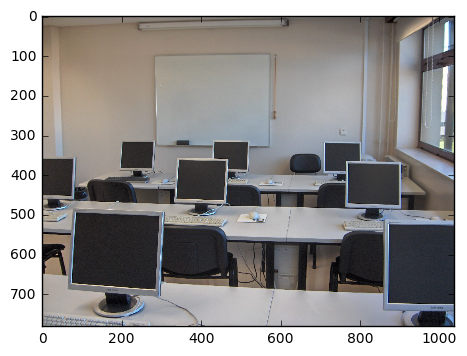

In [5]:
plt.imshow(image)

Note that the 3rd dimension of our image objects is the pixel intensity. This is divided into 3 **color channels**: those belonging to the red (R), green (G) and blue (B) intensities (**RGB** scheme). Each of these intensities ranges from 0 to 255, since these are 24-bit images: each of the 3 colors is represented by 8 bits, so they can range from 0 (all 8 bits set to 0) to 255 (all 8 bits set to 1). Let us define constants for this:

In [6]:
COLORS = ('r','g','b')
COLOR_MIN_VALUE = 0
COLOR_MAX_VALUE = 255
COLOR_NUM_VALUES = COLOR_MAX_VALUE - COLOR_MIN_VALUE + 1

When R, G and B are all zero, the pixel is totally black. When they are all 255, the pixel is totally white. Pure red is (255, 0, 0), pure green (0, 255, 0) and pure blue (0, 0, 255). Intermediate colors have intermediate values, according to what the specific pixel is. For example, let us manipulate the colors of the previous image:

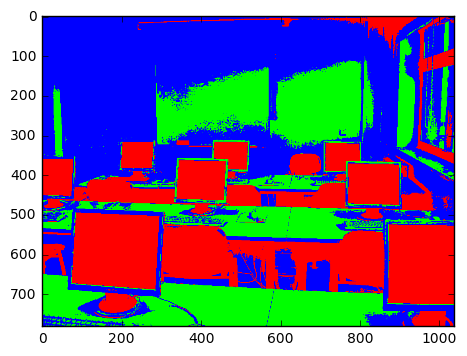

In [7]:
# Tolerance for white and black
tol = 100
white_end = tol - COLOR_MIN_VALUE
black_start = COLOR_MAX_VALUE - tol
# Copy image
image2 = image.copy()
# Set black pixels to pure red
black_pixels = (image[:, :, 0] <= white_end) & (image[:, :, 1] <= white_end) & (image[:, :, 2] <= white_end)
image2[black_pixels] = [COLOR_MAX_VALUE, COLOR_MIN_VALUE, COLOR_MIN_VALUE]
# Set white pixels to pure green
white_pixels = (image[:, :, 0] >= black_start) & (image[:, :, 1] >= black_start) & (image[:, :, 2] >= black_start)
image2[white_pixels] = [COLOR_MIN_VALUE, COLOR_MAX_VALUE, COLOR_MIN_VALUE]
# Set all the rest to pure blue
image2[~(black_pixels | white_pixels)] = [COLOR_MIN_VALUE, COLOR_MIN_VALUE, COLOR_MAX_VALUE]
# Plot result
plt.imshow(image2)

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Build a matrix *X* containing one row for each image in the data. Each row must contain the 3-dimensional matrix of pixels corresponding to an image. Build also a corresponding matrix *Y* with the class of each image (0 for indoor and 1 for outdoor).
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Take advantage of the *glob* package to generate the filename lists for the indoor and outdoor subfolders.
 </td></tr>
</table>

In [9]:
####### INSERT YOUR CODE HERE
import numpy as np
import glob

X = []
Y = []


for path in glob.glob('./data/*/*'):
    X.append (imread(path))
    if path[7] =="i":
        Y.append (0)
    else:
        Y.append (1)

print(type(X))
print(X[:3])

<class 'list'>
[array([[[118, 104,  93],
        [117, 103,  92],
        [117, 103,  92],
        ..., 
        [100, 100, 108],
        [ 99, 102, 111],
        [100, 103, 112]],

       [[118, 104,  93],
        [118, 104,  93],
        [119, 105,  94],
        ..., 
        [ 99, 102, 109],
        [ 99, 102, 111],
        [ 99, 102, 111]],

       [[118, 104,  93],
        [118, 104,  93],
        [120, 106,  95],
        ..., 
        [102, 105, 112],
        [101, 104, 113],
        [ 99, 101, 113]],

       ..., 
       [[143, 148, 141],
        [140, 142, 137],
        [143, 143, 141],
        ..., 
        [106, 154, 192],
        [ 97, 148, 195],
        [100, 151, 206]],

       [[155, 155, 147],
        [151, 152, 146],
        [150, 152, 149],
        ..., 
        [109, 157, 195],
        [ 98, 150, 197],
        [101, 152, 205]],

       [[157, 152, 148],
        [156, 152, 149],
        [152, 154, 153],
        ..., 
        [103, 153, 190],
        [ 98, 151, 195],
  

If everything has been properly loaded both lists should have equal length

In [10]:
print(len(X))
print(len(Y))

376
376


In [13]:
[print(X[n].shape) for n in range(3)]

(781, 1037, 3)
(480, 640, 3)
(240, 320, 3)


[None, None, None]

In [22]:
print(type(X[0]))
print(type(Y))
print(type(Y[0]))
Y[170:196]


<class 'numpy.ndarray'>
<class 'list'>
<class 'int'>


[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Divide the data randomly into a training and a test set. Make sure that:
<ol>
<li>The training and test sets have the same size.</li>
<li>The proportion of indoor and outdoor images is the same inside the training and test sets.</li>
</ol>
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
The first requirement is trivial by halving the data. However, for the second requirement take into account that there are more outdoor than indoor images. This should still be the case after you partition the data. 
 </td></tr>
</table>

In [35]:
####### INSERT YOUR CODE HERE
from sklearn.cross_validation import StratifiedKFold

X_array = np.array(X)
y_array = np.array(Y)


skf = StratifiedKFold(y_array,n_folds=2)

for train_indice, test_indice in skf:
    X_train, X_test = X_array[train_indice], X_array[test_indice]
    y_train, y_test = y_array[train_indice], y_array[test_indice]
    
print(type(X_train))
print(type(y_train))
print(type(skf))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'sklearn.cross_validation.StratifiedKFold'>


C:\Users\Casy\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<span style="color:blue">Hay 176 imágenes de *indoor* y 200 de *outdoor*, en total 376. Los conjuntos de entrenamiento y test contienen cada uno la mitad, es decir, 188:</span>

In [36]:
print(X_train.shape)
print(y_train.shape)

(188,)
(188,)


In [37]:
print(X_train[0].shape)
print(y_train[0].shape)


(781, 1037, 3)
()


In [40]:
[print(X_train[n].shape) for n in range(3)]

(781, 1037, 3)
(480, 640, 3)
(240, 320, 3)


[None, None, None]

<span style="color:blue">Además, en los conjuntos de entrenamiento y test por separado se mantiene la misma proporción de imágenes indoor y outdoor que en el conjunto total de imágenes (176 indoor/ 200 outdoor = 88% indoor): </span>

In [44]:
contador0 = 0
contador1 = 0

for numero in y_train:
    if numero == 0:
        contador0 += 1
    else:
        contador1 += 1
        
print(contador0)
print(contador1)

88
100


## Part 1: SVM approach

To be able to apply SVMs, we cannot work with 3-dimensional images as inputs. Instead, we should transform each of the *n* images into a *d*-dimensional vector, so that the pattern matrix *X* is a numpy matrix with shape (n, d).

It is not enough to collapse the 3-dimensions (height, width and color) into a vector, because not all images have the same height and width, so we would not obtain the same *d*. Somehow we need to obtain a vector of the same length for all images, regardless of their size. The color channel looks like a good candidate: it always has 3 subchannels (R, G, B) and the values of each of these subchannels are always in the range [0, 255].

The idea thus is to count how many times each value of R, G and B appears in the image, that is, getting a **color histogram**. Doing this separately for subchannel gives us a 256·3 = 768-dimensional vector. To keep counts in the same scale regardless of the image size, we can normalize these counts dividing them by their sum, obtaining **color frequencies**, so that the sum of all frequencies is 1.


<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Implement a function *color_frequencies* that, given an image, returns the vector described.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Study carefully the documentation of numpy's <a href=http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.histogram.html>histogram function</a>.
 </td></tr>
</table>

<span style="color:blue">Cada imagen es un tensor de orden 3 (en lenguaje informático se diría un array de 3 dimensiones). De modo que puede considerarse que cada imagen es una matriz en la que cada uno de sus elementos es un vector de 3 componentes que corresponden, respectivamente, a las intensidades de los 3 colores rojo, verde y azul (R, G, B). Por ejemplo, para la imagen de arriba, que tiene 781 píxeles de altura x 1037 píxeles de anchura es algo del tipo:</span>

In [198]:
%%latex
\begin{pmatrix}
(r, g, b)_{00} & (r, g, b)_{01} & (r, g, b)_{02} & \ldots & (r, g, b)_{0\; 1036} \\
(r, g, b)_{10} & (r, g, b)_{11} & (r, g, b)_{02} & \ldots & (r, g, b)_{1\; 1036} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
(r, g, b)_{780\; 0} & (r, g, b)_{780\; 1} & (r, g, b)_{780\; 2} & \ldots & (r, g, b)_{780\; 1036} \\
\end{pmatrix}

<IPython.core.display.Latex object>

<span style="color:blue">Esto es:</span>

In [209]:
for i in range(3):
    for j in range(3):
        print(image[i][j],end="   ")
    print("...  ",image[i][1036])
    print("")
print("           ...")
print("")
for k in range(3):
    print(image[780][k],end="   ")
print("...  ",image[780][1036])    

[118 104  93]   [117 103  92]   [117 103  92]   ...   [100 103 112]

[118 104  93]   [118 104  93]   [119 105  94]   ...   [ 99 102 111]

[118 104  93]   [118 104  93]   [120 106  95]   ...   [ 99 101 113]

           ...

[157 152 148]   [156 152 149]   [152 154 153]   ...   [102 153 206]


<span style="color:blue">Por ejemplo, los elementos primero y último de la primera fila de la matriz, es decir, $(r, g, b)_{00}$ y $(r, g, b)_{0\;1036}$ son:</span>

In [201]:
print(image[0][0])
print(image[0][1036])

[118 104  93]
[100 103 112]


<span style="color:blue">Cada una de las 3 componentes del elemento $(r, g, b)_{ij}$ toma un valor entero comprendido en el rango [0, 255]. Se pretende hacer un histograma de cada color (cada componente) por separado. Se tendrán entonces 256 *bins* en cada uno de los 3 histogramas. Se puede empezar por redimensionar el tensor para convertirlo en una matriz con solo 3 columnas, correspondientes a cada color, y tantas filas como el producto de filas y columnas de la matriz de vectores inicial. En el caso de la imagen de ejemplo será una matriz con 781 x 1037 = 809 897 filas y 3 columnas.  
Voy a probarlo primero con tensores más pequeños para pasar después a las imágenes que se tienen como datos. Genero un array (tensor) de 2 dimensiones donde las componentes de los vectores de longitud 3 toman por el momento solo 5 valores.</span>

In [91]:
r = np.random.randint(0,5,size=(10,3))


In [100]:
r

array([[4, 4, 4],
       [0, 1, 1],
       [4, 1, 2],
       [1, 1, 4],
       [1, 4, 2],
       [0, 4, 2],
       [1, 2, 4],
       [4, 0, 3],
       [0, 3, 3],
       [4, 2, 4]])

<span style="color:blue">Cada columna se corresponde a un "color". Hago la traspuesta, de manera que ahora cada fila corresponde a un color y contiene todos los valores de intensidad de ese "color" que se pretenden ordenar en un histograma.</span>

In [103]:
tras = r.T
tras

array([[4, 0, 4, 1, 1, 0, 1, 4, 0, 4],
       [4, 1, 1, 1, 4, 4, 2, 0, 3, 2],
       [4, 1, 2, 4, 2, 2, 4, 3, 3, 4]])

<span style="color:blue">Por ejemplo, las intensidades del subcanal del "color rojo" son:</span>

In [104]:
tras[0]

array([4, 0, 4, 1, 1, 0, 1, 4, 0, 4])

<span style="color:blue">Su histograma tendrá 5 *bins* correspondientes a los 5 valores de "intensidad de color" :</span>

In [112]:
hist, bordes = np.histogram(tras[0],bins=range(6))

In [113]:
hist

array([3, 3, 0, 0, 4], dtype=int64)

In [114]:
bordes

array([0, 1, 2, 3, 4, 5])

<span style="color:blue">Es decir, para el canal rojo el valor 0 se da 3 veces, el valor 1 otras 3, los valores 2 y 3 no aparecen y el valor 4 figura 4 veces. Igualmente, para el color verde el histograma es:</span>

In [158]:
hist2 = np.histogram(tras[1],bins=range(6))

In [159]:
hist2

(array([1, 3, 2, 1, 3], dtype=int64), array([0, 1, 2, 3, 4, 5]))

In [122]:
type(hist2)

tuple

In [142]:
type(hist2[0])

numpy.ndarray

<span style="color:blue">La función *histogram* devuelve una dupla. En el primer elemento está el histograma en sí, mientras que el segundo muestra sencillamente los extremos de los intervalos del histograma (*bins*). Aquí son [0,1), [1,2), [2,3), [3,4) y [4,5].</span>

In [161]:
hist2lista = list(hist2[0])
hist2lista

[1, 3, 2, 1, 3]

In [123]:
print(hist2[0])
print(hist2[1])

[1 3 2 1 3]
[0 1 2 3 4 5]


<span style="color:blue">Mediante un bucle for hago el histograma de cada fila (cada color) y los voy uniendo en una lista:</span>

In [164]:
histograma = []

for i in range(3):
    hist = np.histogram(tras[i],bins=range(6))
    histograma = histograma + list(hist[0])
    
print(histograma)

[3, 3, 0, 0, 4, 1, 3, 2, 1, 3, 0, 1, 3, 2, 4]


<span style="color:blue">Los 5 primeros valores anteriores corresponden con los 5 *bins* del histograma del color rojo, los siguientes 5 valores (del sexto al décimo) corresponden con los 5 intervalos del histograma del color verde, y los 5 últimos a los del histograma del azul.  
Aplico ahora el procedimiento a un tensor de orden 3, que es ya del tipo que se maneja en esta práctica.</span>

In [177]:
r = np.random.randint(0,5,size=(4,5,3))
r

array([[[1, 1, 4],
        [0, 1, 1],
        [0, 3, 4],
        [3, 0, 3],
        [4, 2, 2]],

       [[0, 1, 4],
        [3, 1, 4],
        [0, 3, 2],
        [1, 2, 0],
        [0, 1, 3]],

       [[3, 3, 0],
        [3, 3, 4],
        [3, 3, 3],
        [1, 2, 3],
        [4, 4, 1]],

       [[0, 2, 2],
        [4, 0, 3],
        [0, 4, 3],
        [0, 1, 4],
        [3, 1, 2]]])

<span style="color:blue">En este caso, el array tiene 3 dimensiones y lo tengo que redimensionar a 2. La primera dimensión es el producto de las dos primeras dimensiones del array de 3 dimensiones de partida, es decir, 4 x 5 = 20. La segunda dimensión es la tercera dimensión del array original, 3.</span>

In [179]:
rs = r.reshape(20,3)
rs

array([[1, 1, 4],
       [0, 1, 1],
       [0, 3, 4],
       [3, 0, 3],
       [4, 2, 2],
       [0, 1, 4],
       [3, 1, 4],
       [0, 3, 2],
       [1, 2, 0],
       [0, 1, 3],
       [3, 3, 0],
       [3, 3, 4],
       [3, 3, 3],
       [1, 2, 3],
       [4, 4, 1],
       [0, 2, 2],
       [4, 0, 3],
       [0, 4, 3],
       [0, 1, 4],
       [3, 1, 2]])

<span style="color:blue">Y traspongo.</span>

In [180]:
ss = rs.T
print(ss)

[[1 0 0 3 4 0 3 0 1 0 3 3 3 1 4 0 4 0 0 3]
 [1 1 3 0 2 1 1 3 2 1 3 3 3 2 4 2 0 4 1 1]
 [4 1 4 3 2 4 4 2 0 3 0 4 3 3 1 2 3 3 4 2]]


<span style="color:blue">Y se hace el histograma, que es una lista de 15 elementos, correspondientes a 5 bins para cada uno de los 3 colores en el orden rojo, verde y azul.</span>

In [210]:
histograma = []

for i in range(3):
    hist = np.histogram(ss[i],bins=range(6))
    histograma = histograma + list(hist[0])
    
print(histograma)

[8, 3, 0, 6, 3, 2, 7, 4, 5, 2, 2, 2, 4, 6, 6]


<span style="color:blue">Visto que funciona, paso a implementar el procedimiento de forma automática agrupando todos los pasos dentro de una función *colores* que da las frecuencias absolutas de cada valor de intesidad de los 3 colores.</span>

In [213]:
def colores(entrada):
    
    histograma = []
    dimension1 = len(entrada)*len(entrada[0])
    dimension2 = len(entrada[0][0])
    entrada1 = entrada.reshape(dimension1,dimension2)
    entrada1tras = entrada1.T
    
    for i in range(dimension2):
        hist = np.histogram(entrada1tras[i],bins=range(6))
        histograma = histograma + list(hist[0])
        
    return histograma

<span style="color:blue">Aplico esta función a mi array $r$ de 3 dimensiones y se obtiene exactamente lo mismo que con todos los pasos individuales anteriores.</span>

In [214]:
colores(r)

[8, 3, 0, 6, 3, 2, 7, 4, 5, 2, 2, 2, 4, 6, 6]

<span style="color:blue">Ahora la aplico la imagen de ejemplo. Se tendrán 256 *bins* para cada uno de los 3 histogramas, es decir, que la salida de la función es una lista de 256x3=768 elementos, donde los 256 primeros corresponden al histograma de intensidades del rojo, los siguientes 256 al histograma del verde y los 256 últimos a los del azul.</span>

In [215]:
def colores(entrada):
    
    histograma = []
    dimension1 = len(entrada)*len(entrada[0])
    dimension2 = len(entrada[0][0])
    entrada1 = entrada.reshape(dimension1,dimension2)
    entrada1tras = entrada1.T
    
    for i in range(dimension2):
        hist = np.histogram(entrada1tras[i],bins=range(257))
        histograma = histograma + list(hist[0])
        
    return histograma

In [280]:
colores_imagen1 = colores(image)


In [220]:

for i in range(48):
    
    for j in range(16*i,16*(1+i)):
        print(colores_imagen1[j],",",end=' ')
    print("")

392 , 173 , 153 , 208 , 237 , 303 , 324 , 365 , 418 , 442 , 474 , 545 , 536 , 628 , 695 , 787 , 
832 , 907 , 1002 , 1149 , 1150 , 1255 , 1535 , 1677 , 1916 , 2201 , 2613 , 2738 , 3264 , 3667 , 4232 , 4823 , 
5682 , 6457 , 7191 , 7658 , 8517 , 8805 , 9027 , 8947 , 8678 , 8465 , 7708 , 6990 , 6576 , 6040 , 5591 , 5242 , 
5074 , 4877 , 4686 , 4371 , 4079 , 3834 , 3517 , 3114 , 2740 , 2314 , 2025 , 1771 , 1494 , 1341 , 1098 , 1087 , 
1009 , 965 , 882 , 923 , 900 , 874 , 894 , 890 , 819 , 796 , 827 , 871 , 855 , 879 , 872 , 966 , 
960 , 1045 , 1061 , 1072 , 1130 , 1125 , 1176 , 1195 , 1277 , 1369 , 1396 , 1436 , 1478 , 1419 , 1460 , 1480 , 
1550 , 1508 , 1561 , 1725 , 1830 , 1957 , 2143 , 2273 , 2205 , 2194 , 2208 , 2057 , 2042 , 2015 , 2079 , 2139 , 
2167 , 2269 , 2293 , 2468 , 2529 , 2781 , 2946 , 3004 , 3289 , 3473 , 3700 , 3669 , 3799 , 3973 , 4049 , 4115 , 
4370 , 4608 , 4686 , 4858 , 4843 , 5030 , 5099 , 5263 , 5681 , 6032 , 6272 , 6119 , 6014 , 5601 , 5503 , 5772 , 
5865 , 6119 , 674

<span style="color:blue">Que es exactamente el histograma proporcionado más abajo. Por claridad he mostrado 16 valores por línea para que visualmente puedan compararse ambos fácilmente.  
Pero hay que hacer un histograma de frecuencias relativas. Por tanto, modifico la función.</span>

In [45]:
####### INSERT YOUR CODE HERE


In [233]:
def color_frequencies(entrada):
    
    histograma = []
    dimension1 = len(entrada)*len(entrada[0])
    dimension2 = len(entrada[0][0])
    entrada1 = entrada.reshape(dimension1,dimension2)
    entrada1tras = entrada1.T
    
    for i in range(dimension2):
        hist = np.histogram(entrada1tras[i],bins=range(257))
        histograma = histograma + list(hist[0])
        histograma_rel = list(histograma/sum(histograma))
        
    return histograma_rel

In [234]:
colores_imagen1_rel = color_frequencies(image)

In [235]:
colores_imagen1_rel

[0.000161337388169936,
 7.1202469779078906e-05,
 6.29709703826536e-05,
 8.5607593722823193e-05,
 9.7543267847639885e-05,
 0.0001247072158558434,
 0.00013335029022208997,
 0.00015022486398476184,
 0.0001720383373852889,
 0.00018191613666099929,
 0.00019508653569527977,
 0.0002243083585525896,
 0.00022060418382419822,
 0.00025846908104775466,
 0.00028604460402577943,
 0.00032390950124933581,
 0.00034243037489129277,
 0.00037329849762788767,
 0.00041239811976090786,
 0.00047289964032463385,
 0.00047331121529445514,
 0.00051652658712568803,
 0.00063176757867564233,
 0.00069021122439026194,
 0.00078857764217754437,
 0.000905876508576605,
 0.0010754453961429663,
 0.0011268922673706246,
 0.0013433807014966101,
 0.0015092454143345801,
 0.001741785272283595,
 0.0019850260794479625,
 0.0023385689785244295,
 0.0026575395801359102,
 0.002959635607984719,
 0.00315184111889125,
 0.003505384017967717,
 0.0036239176092762414,
 0.0037152872525765624,
 0.0036823612549908608,
 0.0035716475881089407,
 0.0

<span style="color:blue">Represento gráficamente el histograma de intensidades para hacerme una idea más visual de cómo están distribuidas las intensidades de los tres colores en la imagen. Puede apreciarse que la proporción de azul es baja, como cabría esperar para una imagen de interior como la del ejemplo.</span>

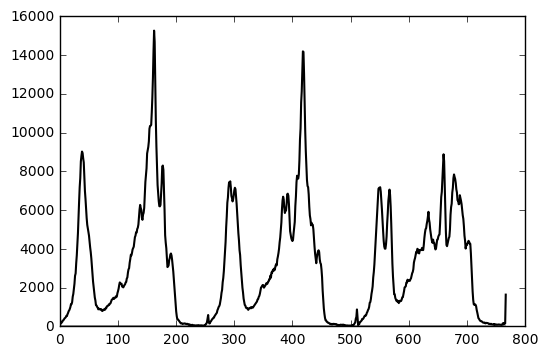

In [578]:
import pylab as P

xi=np.arange(768)

# the histogram of the data with histtype='step'
n, bins, patches = P.hist(xi, 767, histtype='stepfilled')
P.setp(patches, 'facecolor', 'g', 'alpha', 0.75)

# add a line showing the expected distribution
#y = P.normpdf( bins, mu, sigma)
yi=np.array(colores_imagen1)

l = P.plot(bins, yi, 'k-', linewidth=1.5)

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Check the correctness of your implementation with the following code, which has the histogram for the image plotted above.
 </td></tr>
</table>

In [278]:
rgb_hist = [392, 173, 153, 208, 237, 303, 324, 365, 418, 442, 474, 545, 536, 628, 695, 787, 
              832, 907, 1002, 1149, 1150, 1255, 1535, 1677, 1916, 2201, 2613, 2738, 3264, 3667, 4232, 4823, 
              5682, 6457, 7191, 7658, 8517, 8805, 9027, 8947, 8678, 8465, 7708, 6990, 6576, 6040, 5591, 5242, 
              5074, 4877, 4686, 4371, 4079, 3834, 3517, 3114, 2740, 2314, 2025, 1771, 1494, 1341, 1098, 1087, 
              1009, 965, 882, 923, 900, 874, 894, 890, 819, 796, 827, 871, 855, 879, 872, 966, 
              960, 1045, 1061, 1072, 1130, 1125, 1176, 1195, 1277, 1369, 1396, 1436, 1478, 1419, 1460, 1480, 
              1550, 1508, 1561, 1725, 1830, 1957, 2143, 2273, 2205, 2194, 2208, 2057, 2042, 2015, 2079, 2139, 
              2167, 2269, 2293, 2468, 2529, 2781, 2946, 3004, 3289, 3473, 3700, 3669, 3799, 3973, 4049, 4115, 
              4370, 4608, 4686, 4858, 4843, 5030, 5099, 5263, 5681, 6032, 6272, 6119, 6014, 5601, 5503, 5772, 
              5865, 6119, 6741, 7454, 7832, 8162, 8927, 9110, 9263, 9553, 10203, 10345, 10357, 10402, 11042, 11818, 
              12840, 14189, 15268, 14686, 12585, 10599, 9268, 8238, 7304, 6902, 6465, 6210, 6197, 6271, 6870, 7374, 
              8241, 8305, 8081, 7103, 5998, 4710, 4328, 4042, 3552, 3065, 3096, 3158, 3429, 3537, 3713, 3765, 
              3661, 3432, 3154, 2835, 2436, 1993, 1581, 1255, 776, 528, 362, 359, 326, 283, 245, 196, 
              157, 162, 152, 126, 147, 145, 156, 152, 132, 138, 120, 137, 118, 96, 110, 75, 
              90, 81, 58, 79, 84, 62, 58, 64, 52, 39, 54, 42, 58, 54, 67, 59, 
              53, 56, 54, 42, 58, 45, 47, 44, 48, 60, 61, 124, 140, 225, 424, 589, 
              256, 152, 164, 248, 275, 332, 379, 400, 450, 454, 529, 580, 622, 668, 707, 839, 
              906, 1001, 1043, 1125, 1316, 1475, 1735, 1889, 2281, 2500, 2854, 3358, 3832, 4360, 5125, 5674, 
              6387, 6649, 714, 7442, 7369, 7491, 7190, 6738, 6625, 6453, 6564, 6768, 7024, 7158, 7087, 6690, 
              6319, 5800, 5221, 4808, 4440, 3936, 3686, 3162, 2764, 2381, 1998, 1751, 1438, 1262, 1108, 1076, 
              974, 944, 957, 905, 857, 933, 941, 938, 981, 939, 994, 992, 971, 1014, 1066, 1113, 
              1153, 1199, 1243, 1287, 1393, 1410, 1521, 1574, 1688, 1856, 2012, 2039, 2104, 2140, 2128, 2001, 
              2047, 2096, 2146, 2226, 2187, 2211, 2305, 2320, 2430, 2430, 2622, 2513, 2790, 2765, 2892, 2877, 
              2981, 2894, 2978, 3134, 3214, 3154, 3466, 3613, 3791, 4018, 4347, 4589, 4968, 5369, 6058, 6500, 
              6698, 6559, 6122, 5855, 5979, 5988, 6306, 6823, 6852, 6747, 6307, 5619, 4918, 4753, 4562, 4463, 
              4410, 4475, 4807, 5075, 5393, 6216, 6711, 7446, 7779, 7645, 7631, 7848, 8558, 9652, 10224, 11556, 
              12131, 13175, 14197, 14171, 13034, 11487, 10087, 9046, 8331, 7559, 7250, 7187, 6819, 6182, 5727, 5539, 
              5219, 5348, 5260, 5244, 5017, 4547, 4123, 3753, 3516, 3264, 3556, 3740, 3878, 3929, 3844, 3461, 
              3277, 3219, 2941, 2531, 1850, 1417, 933, 660, 446, 320, 308, 243, 228, 191, 190, 166, 
              160, 119, 133, 109, 133, 108, 135, 131, 128, 118, 118, 118, 83, 94, 77, 77, 
              70, 72, 78, 92, 88, 79, 76, 95, 85, 74, 75, 58, 53, 49, 37, 53, 
              43, 33, 47, 44, 49, 49, 48, 65, 72, 66, 110, 145, 207, 398, 492, 877, 
              442, 68, 148, 120, 225, 239, 271, 304, 387, 377, 410, 468, 530, 562, 552, 602, 
              702, 757, 846, 899, 1007, 1224, 1258, 1423, 1676, 1848, 2068, 2529, 2810, 3205, 3789, 4338, 
              4939, 5436, 5993, 6569, 7102, 7151, 7170, 7184, 6949, 6514, 6022, 5424, 4928, 4421, 4124, 4015, 
              4013, 4245, 4644, 5332, 5845, 6473, 6749, 7063, 6795, 6195, 5303, 4237, 3235, 2572, 2109, 1664, 
              1659, 1468, 1387, 1320, 1353, 1262, 1310, 1204, 1324, 1286, 1320, 1316, 1393, 1503, 1513, 1653, 
              1818, 2015, 2040, 2073, 2271, 2259, 2413, 2338, 2366, 2357, 2355, 2433, 2483, 2608, 2746, 2812, 
              2953, 3296, 3432, 3534, 3699, 3856, 3785, 4008, 3974, 3919, 3767, 3939, 3950, 3937, 3951, 4055, 
              3942, 3944, 4209, 4568, 4831, 5019, 5064, 5284, 5436, 5651, 5916, 5525, 5350, 5006, 4790, 4575, 
              4409, 4318, 4483, 4322, 4312, 4120, 3974, 4017, 4236, 4475, 4489, 4637, 4711, 4743, 5294, 6054, 
              6681, 6945, 7616, 8358, 8885, 8534, 7302, 5912, 4880, 4204, 4143, 4278, 4414, 4563, 4630, 5010, 
              5766, 6160, 6337, 6910, 7153, 7654, 7846, 7714, 7609, 7398, 7073, 6914, 6512, 6514, 6306, 6319, 
              6773, 6645, 6494, 6316, 6025, 5739, 5557, 5174, 4686, 4432, 4020, 4200, 4194, 4279, 4339, 4418, 
              4370, 4268, 4265, 3780, 3084, 2344, 1806, 1369, 1139, 1118, 1145, 1120, 1046, 855, 721, 559, 
              427, 392, 336, 294, 272, 276, 254, 222, 199, 192, 204, 183, 158, 190, 171, 181, 
              171, 159, 128, 135, 138, 118, 134, 111, 105, 107, 120, 88, 119, 92, 99, 84, 
              98, 90, 92, 105, 97, 89, 90, 82, 81, 97, 164, 107, 166, 154, 148, 1642]
np.all(color_frequencies(image) == [x/sum(rgb_hist) for x in rgb_hist])

True

In [281]:
np.all(colores_imagen1 == rgb_hist)

True

In [318]:
sum(rgb_hist)/3

809897.0

In [319]:
781*1037 # número de filas y columnas, es decir, de píxeles de la imagen.

809897

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Transform the training and test sets with *color_frequencies*.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Be careful not to overwrite the training and test set variables, cause they will be needed in the Deep Learning section.
 </td></tr>
</table>

In [284]:
####### INSERT YOUR CODE HERE
X_train_hist=[]

for x in X_train:
    X_train_hist.append(color_frequencies(x))

In [288]:
print(type(X_train_hist))
print(len(X_train_hist))
print(type(X_train_hist[0]))
print(len(X_train_hist[0]))

<class 'list'>
188
<class 'list'>
768


In [289]:
X_test_hist=[]

for x in X_test:
    X_test_hist.append(color_frequencies(x))

Now that we have transformed our images into fixed-length vectors, we are ready to apply the SVM machinery. As we know, there are 3 possibilities for this:
* A linear SVM.
* A non-linear SVM with some existing kernel (e.g., RBF).
* A non-linear SVM with a custom kernel for this task.

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Tune a linear SVM with the values of *C* you deem appropriate. Report the best value found and its performances on training and test.
 </td></tr>
</table>

<span style="color:blue">Voy a probar dos modelos lineales: una instancia de la clase SVC() y otra de la clase LinearSVC().</span>

In [290]:
####### INSERT YOUR CODE HERE
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

Cs = np.logspace(-2, 4, 7)

gs_lin=GridSearchCV(estimator=SVC(kernel='linear'),
                   param_grid={"C": Cs,
                                  #"kernel": "linear"#,"poly","rbf"],
                                  #"degree": [2,3,4]
                              #"gamma":gammas
                              },
                               
                      scoring="roc_auc",
                      cv=5,
                      verbose=1)
print(gs_lin)

gs_lin.fit(X_train_hist,y_train)

C:\Users\Casy\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=1)
Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    4.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=1)

In [292]:
best_model = gs_lin.best_estimator_
print("El mejor modelo es:")
print("")
print(best_model)
print("")

best_C = gs_lin.best_params_["C"]
print("El mejor valor de C es: %s" %(best_C))

best_acc = gs_lin.best_score_
print("La mejor accuracy en entrenamiento es: %s" %(best_acc))

print("La mejor accuracy en test es: %s" %(best_model.score(X_test_hist, y_test)))

accs = np.zeros(len(Cs))   
n=0
# Para cada valor de C
for i, C in enumerate(Cs):
    accs[i] = round(gs_lin.grid_scores_[n][1],4) # round para redondear a 4 decimales
    n=n+1

print("El vector de accuracies con validación cruzada es:")
print("")
print(accs)

El mejor modelo es:

SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

El mejor valor de C es: 1000.0
La mejor accuracy en entrenamiento es: 0.7082133917396747
La mejor accuracy en test es: 0.670212765957
El vector de accuracies con validación cruzada es:

[ 0.6368  0.6154  0.6159  0.6131  0.6688  0.7082  0.7028]


In [294]:
from sklearn.svm import LinearSVC

gs_lin2=GridSearchCV(estimator=LinearSVC(loss='hinge'),
                       param_grid={'C':Cs},
                       scoring="roc_auc",
                       cv=5,
                       verbose=1)
print(gs_lin2)

gs_lin2.fit(X_train_hist,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=1)
Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   18.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=1)

In [295]:
best_model2 = gs_lin2.best_estimator_
print("El mejor modelo es:")
print("")
print(best_model2)
print("")

best_C2 = gs_lin2.best_params_["C"]
print("El mejor valor de C es: %s" %(best_C2))

best_acc2 = gs_lin2.best_score_
print("La mejor accuracy en entrenamiento es: %s" %(best_acc2))

print("La mejor accuracy en test es: %s" %(best_model2.score(X_test_hist, y_test)))

accs2 = np.zeros(len(Cs))   
n=0
# Para cada valor de C
for i, C in enumerate(Cs):
    accs2[i] = round(gs_lin2.grid_scores_[n][1],4) # round para redondear a 4 decimales
    n=n+1

print("El vector de accuracies con validación cruzada es:")
print("")
print(accs2)

El mejor modelo es:

LinearSVC(C=10000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

El mejor valor de C es: 10000.0
La mejor accuracy en entrenamiento es: 0.7288659435405368
La mejor accuracy en test es: 0.542553191489
El vector de accuracies con validación cruzada es:

[ 0.5742  0.5748  0.6232  0.626   0.6632  0.7003  0.7289]


<span style="color:blue">El segundo modelo lineal (con LinearSVC) tiene mejor *accuracy* en entrenamiento, pero en test es pésimo. Es preferible el de la clase SVC().</span>

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Tune an RBF SVM with the values of *C* and *gamma* you deem appropriate. Report the best values found and their performances on training and test.
 </td></tr>
</table>

In [296]:
####### INSERT YOUR CODE HERE
gammas = np.logspace(-4, 4, 9)

gs_rbf = GridSearchCV(estimator=SVC(kernel='rbf'),
                   param_grid={"C": Cs,
                                  #"kernel": ["linear","poly","rbf"],
                                  #"degree": [2,3,4]
                              "gamma":gammas
                              },
                               
                      scoring="roc_auc",
                      cv=5,
                      verbose=2)

print(gs_rbf)

gs_rbf.fit(X_train_hist,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04]), 'gamma': array([  1.00000e-04,   1.00000e-03,   1.00000e-02,   1.00000e-01,
         1.00000e+00,   1.00000e+01,   1.00000e+02,   1.00000e+03,
         1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=2)
Fitting 5 folds for each of 63 candidates, totalling 315 fits
[CV] C=0.01, gamma=0.0001 ............................................
[CV] ................................... C=0.01, gamma=0.0001 -   0.2s
[CV] C=0.01, gamma=0.0001 ............................................
[CV] .........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ................................... C=0.01, gamma=0.0001 -   0.1s
[CV] C=0.01, gamma=0.0001 ............................................
[CV] ................................... C=0.01, gamma=0.0001 -   0.1s
[CV] C=0.01, gamma=0.0001 ............................................
[CV] ................................... C=0.01, gamma=0.0001 -   0.1s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .................................... C=0.01, gamma=0.001 -   0.0s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .................................... C=0.01, gamma=0.001 -   0.0s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .................................... C=0.01, gamma=0.001 -   0.0s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .................................... C=0.01, gamma=0.001 -   0.1s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04]), 'gamma': array([  1.00000e-04,   1.00000e-03,   1.00000e-02,   1.00000e-01,
         1.00000e+00,   1.00000e+01,   1.00000e+02,   1.00000e+03,
         1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=2)

In [301]:
best_model_rbf = gs_rbf.best_estimator_
print("El mejor modelo es:")
print("")
print(best_model_rbf)
print("")

best_C_rbf = gs_rbf.best_params_["C"]
print("El mejor valor de C es: %s" %(best_C_rbf))

best_gamma_rbf =gs_rbf.best_params_["gamma"]
print("El mejor valor de gamma es: %s" %(best_gamma_rbf))

best_acc_rbf = gs_rbf.best_score_
print("La mejor accuracy en entrenamiento es: %s" %(best_acc_rbf))

accs_rbf = np.zeros((len(Cs), len(gammas)))   
n=0
# Para cada valor de C
for i, C in enumerate(Cs):
    # Para cada valor de gamma
    for j, gamma in enumerate(gammas):
        accs_rbf[i, j] = round(gs_rbf.grid_scores_[n][1],4) # round para redondear a 4 decimales
        n=n+1

print("La matriz de accuracies con validación cruzada es:")
print("")
print(accs_rbf)

print("")
print("La mejor accuracy en test es: %s" %(best_model_rbf.score(X_test_hist, y_test)))

El mejor modelo es:

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=100.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

El mejor valor de C es: 10.0
El mejor valor de gamma es: 100.0
La mejor accuracy en entrenamiento es: 0.7542883465442914
La matriz de accuracies con validación cruzada es:

[[ 0.6384  0.6457  0.6368  0.6385  0.6391  0.6418  0.6891  0.6667  0.6268]
 [ 0.6333  0.6395  0.6368  0.6385  0.6248  0.6283  0.6834  0.6672  0.6239]
 [ 0.6468  0.6451  0.6368  0.604   0.6153  0.6306  0.719   0.7085  0.6257]
 [ 0.6468  0.6451  0.604   0.6154  0.6125  0.6857  0.7543  0.6799  0.624 ]
 [ 0.6468  0.6204  0.6131  0.6136  0.6778  0.7442  0.6996  0.6749  0.624 ]
 [ 0.6283  0.6142  0.6136  0.6766  0.7082  0.7084  0.6887  0.6749  0.624 ]
 [ 0.617   0.6148  0.6767  0.7008  0.6891  0.7053  0.6887  0.6749  0.624 ]]

La mejor accuracy en test es: 0.702127659574


<span style="color:blue">La *accuracy* en test ha mejorado 3 puntos porcentuales con el kernel gaussiano respecto al kernel lineal.</span>

For the custom kernel part, let us use the so-called **histogram intersection kernel**, described in this <a href=http://slipguru.disi.unige.it/Downloads/publications/icip03.pdf>article by Barla, Odone and Verri</a>. As the paper explains, given two image histograms, it amounts to computing the sum of all minimal bins (see Eq. 6). The article also shows that this is a Mercel kernel (so it can be used in SVMs with theoretical guarantees) and applies it to solve the same problem we are dealing with: distinguishing indoor from outdoor images.

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Implement a function *histogram_intersection* that computes the histogram intersection kernel.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Recall that kernels in scikit-learn receive a (n1, d) matrix and a (n2, d) matrix, returning a (n1, n2) matrix.
 </td></tr>
</table>

<span style="color:blue">La situación que se tiene aquí con la **clasificación de imágenes** en dos clases (indoor y outdoor) es muy similar a la que se tenía en una práctica previa con el análisis de sentimientos o la **clasificación de textos** en dos clases (religión y ateísmo). En el caso de la clasificación de textos se tenía de entrada una **lista** en la que cada elemento era un **texto**; aquí se tiene una **lista** en la que cada elemento es una **imagen**. En aquel, se descomponían los textos en palabras y se contaba cuántas veces aparecía cada palabra en cada texto, es decir, se hacía un **"histograma" de palabras** para cada documento. Se llegaba a la representación *bag-of-words* donde se tenía una **matriz** en la que **cada fila** representaba **un texto** y **cada columna una palabra** y en cada término de la matriz figuraba el número de veces que aparecía la palabra correspondiente en un texto determinado. Se trataba de datos con cierta estructura espacial porque las palabras adquieren significado por su contexto, es decir, por las palabras que tienen alrededor, por su posición en la oración, etc. Se destruía ese contexto al deshacer los párrafos y líneas del texto y convertirlo todo en una matriz.  
En la clasificación de imágenes se descomponen las imágenes en valores de intensidad para los colores rojo, verde y azul y se cuenta cuántas veces aparece cada valor de intensidad en cada imagen (dicho de otro modo, se cuentan cuántos píxeles de la imagen tienen determinado valor de intensidad). Esto es, se hace un **histograma de intensidades** para cada imagen. Se llega también a una **matriz** en la que **cada fila** representaba **una imagen** y **cada columna una intensidad** y en cada término de la matriz figura el número de veces que aparece cierto valor de intensidad en una imagen determinada. Se trata también de datos con estructura espacial porque la información de un píxel adquiere significado por su contexto, es decir, por los píxeles que tiene alrededor, por su posición en la imagen. Se destruye este contexto al deshacer las posiciones de los píxeles y codificar la información en una matriz.  
Para estudiar la similitud de dos documentos en la clasificación de textos se recurría a la *cosine similarity* y se construía con ella un kernel que se incorporaba al modelo SVM. En ese kernel básicamente se multiplicaba cada vector de palabras de cada documento (previamente normalizado) por todos los vectores de palabras de sendos textos (producto cartesiano). Como los vectores estaban agrupados por filas dentro de la matriz que describía todo el corpus de documentos, lo que se hacía era sencillamente multiplicar la matriz del corpus por ella misma traspuesta. El resultado era una matriz cuadrada simétrica de dimensión igual al número de textos del corpus. Los elementos de la diagonal principal eran todos 1 porque correspondían a multiplicar cada vector de cada texto consigo mismo y, lógicamente, la similitud de un elemento consigo mismo es perfecta. Si dos documentos no tuvieran palabras en común, el producto de sus vectores sería cero, lo cual significa que no tienen ninguna similitud entre ellos.  
Análogamente, lo mismo se puede hacer en la clasificación de imágenes como **primera tentativa** de aproximación al problema. Todos los vectores de intensidades de cada imagen tienen la misma cantidad de componentes, 768, que se corresponden con los 256 valores de intensidad para los 3 subcanales de color. Esta estandarización del número de *bins* es necesaria para construir un kernel como el que se especifica en la referencia bibliográfica. Además, como el número de píxeles de cada imagen es diferente, se han normalizado los vectores de intensidad dividiéndolos entre el (triple del) número total de píxeles. Es decir, cada vector de intensidades de cada imagen es unitario según la norma $\mathbf{L_1}.$ Esto es, se cumple que $\sum_{i=1}^{768}|v_i|=1.$ Por ejemplo, para las primeras 10 imágenes se tiene (después de convertir la lista de listas de intensidades, X_train_hist, en una matriz, X_train_matriz): </span>

In [306]:
X_train_matriz=np.array(X_train_hist).reshape(188,768)

In [312]:
for i in range(10):
    print(sum(X_train_matriz[i]))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


<span style="color:blue">Sin embargo, los vectores de intensidades no son unitarios según la norma euclídea $\mathbf{L_2}$. Por ejemplo, para la primera imagen se tiene que su norma (raíz del producto escalar de su vector consigo mismo) no es 1:</span>

In [310]:
X_train_matriz[0].dot(X_train_matriz[0].T)

0.0024322772122719258

<span style="color:blue">Este producto debería ser 1 porque una imagen es totalmente similar a sí misma dado que se compara su histograma de intensidades consigo mismo. Por tanto voy a reescalar cada vector diviendo todas sus componentes por la misma cantidad: su norma euclídea.</span>

In [313]:
from sklearn.preprocessing import normalize

In [314]:
X_train_matriz_norm = normalize(X_train_matriz)
X_train_matriz_norm[0]

array([ 0.00327136,  0.00144374,  0.00127683,  0.00173582,  0.00197784,
        0.00252863,  0.00270388,  0.00304604,  0.00348834,  0.00368863,
        0.00395568,  0.00454819,  0.00447309,  0.00524085,  0.00579999,
        0.00656776,  0.0069433 ,  0.0075692 ,  0.008362  ,  0.00958876,
        0.00959711,  0.01047336,  0.01281005,  0.01399508,  0.01598961,
        0.01836803,  0.02180629,  0.02284946,  0.02723909,  0.03060225,
        0.03531735,  0.04024943,  0.04741805,  0.05388566,  0.06001112,
        0.06390838,  0.071077  ,  0.07348045,  0.0753331 ,  0.07466548,
        0.07242059,  0.07064304,  0.06432564,  0.05833371,  0.05487875,
        0.05040567,  0.04665862,  0.04374611,  0.0423441 ,  0.04070007,
        0.03910612,  0.03647735,  0.03404052,  0.03199591,  0.02935045,
        0.02598729,  0.02286615,  0.01931104,  0.01689925,  0.01477954,
        0.01246789,  0.01119106,  0.00916315,  0.00907135,  0.00842042,
        0.00805322,  0.00736056,  0.00770272,  0.00751078,  0.00

<span style="color:blue">Ahora todos los vectores son unitarios según la norma euclídea. Por ejemplo, el correspondiente a la primera imagen:</span>

In [316]:
X_train_matriz_norm[0].dot(X_train_matriz_norm[0])

0.99999999999999967

<span style="color:blue">Pero ya no lo son según la norma $\mathbf{L_1}$:</span>

In [315]:
sum(X_train_matriz_norm[0])

20.27652206145601

<span style="color:blue">Al hacer el producto escalar entre dos vectores de intensidades normalizadas de los de esta práctica **no** se está haciendo realmente la intersección de los histogramas de las dos imágenes a las que pertenecen porque se suman los productos de pares de *bins* de sendos vectores en vez de sumar solo los mínimos de cada par. Por tanto, se ha construido un kernel que no sigue totalmente las especificaciones del artículo de Barla, Odone y Verri, sino uno que usa la *cosine similarity*. La función correspondiente a esta primera tentativa que sigue una analogía con la clasificación de textos sería la siguiente.</span>

In [ ]:
####### INSERT YOUR CODE HERE

In [397]:
def coseno2(X1, X2):
    X1_norm = normalize(X1)
    X2_norm = normalize(X2)
    return X1_norm.dot(X2_norm.T)

In [399]:
kernel_train_cos = coseno2(X_train_hist,X_train_hist)

In [400]:
kernel_train_cos.shape

(188, 188)

In [415]:
kernel_test_cos = coseno2(X_test_hist,X_test_hist)

<span style="color:blue">Pero, como ya he dicho, no produce el kernel de intersección de histogramas que se define en la referencia bibliográfica proporcionada. Paso ahora a construir el *histogram intersection kernel* e incorporarlo en una función *histogram_intersection*</span>

In [358]:
def histogram_intersection(X1,X2):
    M=np.zeros((len(X1),len(X2)))
    
    for i in range(len(X1)):
        for j in range(len(X2)):
            M[i,j]=sum(np.minimum(X1[i],X2[j]))
    
    return M

In [359]:
kernel_train = histogram_intersection(X_train_hist,X_train_hist)

In [360]:
kernel_train.shape

(188, 188)

In [394]:
kernel_test =  histogram_intersection(X_test_hist,X_test_hist)

In [395]:
kernel_test.shape

(188, 188)

<span style="color:blue">Imprimo unos pocos valores del kernel de intersección de histogramas para el conjunto de entrenamiento y también algunos valores del kernel de *cosine similarity*. Evidentemente son diferentes, pero ambos son matrices cuadradas de dimensión igual al número de imágenes, simétricas porque la intersección del vector $i$ con el $j$ es la misma que la del $j$ con el $i$ y todos sus términos de la diagonal principal valen 1. En el caso del *histogram intersection kernel* esto es así porque la intersección de un vector consigo mismo selecciona los mínimos de cada pareja de bins y los suma. Y, como ambos bins de la pareja son iguales, simplemene se queda con una de las dos copias y las suma todas. Esta suma da 1 porque los vectores de intensidad están normalizados (según la norma $\mathbf{L_1}$) para que no influya el número de píxeles de las imágenes. En el caso del *cosine similarity kernel* es así porque los vectores de intensidad están normalizados (son unitarios) según la norma $\mathbf{L_2}$ y, por tanto, su producto escalar es 1.</span>

In [402]:
row,col=(5,5)
for i in range(row):
    for j in range(col):
        print(round(kernel_train[i,j],4),end='\t     ')
    print("")

1.0	     0.6283	     0.538	     0.6467	     0.3473	     
0.6283	     1.0	     0.7118	     0.7786	     0.3831	     
0.538	     0.7118	     1.0	     0.6631	     0.3161	     
0.6467	     0.7786	     0.6631	     1.0	     0.4061	     
0.3473	     0.3831	     0.3161	     0.4061	     1.0	     


In [403]:
row,col=(5,5)
for i in range(row):
    for j in range(col):
        print(round(kernel_train_cos[i,j],4),end='\t     ')
    print("")

1.0	     0.6985	     0.6122	     0.7171	     0.209	     
0.6985	     1.0	     0.8022	     0.8489	     0.2419	     
0.6122	     0.8022	     1.0	     0.7703	     0.2444	     
0.7171	     0.8489	     0.7703	     1.0	     0.2926	     
0.209	     0.2419	     0.2444	     0.2926	     1.0	     


In [404]:
row,col=(5,5)
for i in range(row):
    for j in range(col):
        print(round(kernel_test[i,j],4),end='\t     ')
    print("")

1.0	     0.6854	     0.6706	     0.8076	     0.7078	     
0.6854	     1.0	     0.7232	     0.6331	     0.6607	     
0.6706	     0.7232	     1.0	     0.6516	     0.6815	     
0.8076	     0.6331	     0.6516	     1.0	     0.6446	     
0.7078	     0.6607	     0.6815	     0.6446	     1.0	     


In [405]:
"""
Esta sería la función si las variables no fuesen listas de listas, sino arrays de numpy.

def histogram_intersection2(X1,X2):
    M=np.zeros((X1.shape[0],X2.shape[0]))
    
    for i in range(X1.shape[0]):
        for j in range(X2.shape[0]):
            M[i,j]=sum(np.minimum(X1[i],X2[j]))
    
    return M
"""

'\nEsta sería la función si las variables no fuesen listas de listas, sino arrays de numpy.\n\ndef histogram_intersection2(X1,X2):\n    M=np.zeros((X1.shape[0],X2.shape[0]))\n    \n    for i in range(X1.shape[0]):\n        for j in range(X2.shape[0]):\n            M[i,j]=sum(np.minimum(X1[i],X2[j]))\n    \n    return M\n'

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Tune an SVM with *histogram_intersection* as kernel. Compare the results you obtain with those of the linear and RBF SVMs.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Due to a buggy behavior of scikit-learn, it is possible that it does not allow you to use an *SVC* with *kernel=histogram_intersection*, prompting you to use a 'precomputed' kernel. If that is the case, you should do the following:
<ol>
<li>Compute and store the kernel matrix in a separate variable.</li>
<li>Build your *SVC* object with *kernel='precomputed'*.</li>
<li>Call the *fit* method with the variable storing the kernel matrix, instead of the one with the training set.</li>
</ol> <br>
Do analogously when evaluating performance on the test set.
 </td></tr>
</table>

In [407]:
####### INSERT YOUR CODE HERE

gs_custom = GridSearchCV(estimator=SVC(kernel='precomputed'),
                   param_grid={"C": Cs,
                              "gamma":gammas},
                               
                      scoring="roc_auc",
                      cv=5,
                      verbose=2)

print(gs_custom)

gs_custom.fit(kernel_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto',
  kernel='precomputed', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04]), 'gamma': array([  1.00000e-04,   1.00000e-03,   1.00000e-02,   1.00000e-01,
         1.00000e+00,   1.00000e+01,   1.00000e+02,   1.00000e+03,
         1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=2)
Fitting 5 folds for each of 63 candidates, totalling 315 fits
[CV] C=0.01, gamma=0.0001 ............................................
[CV] ................................... C=0.01, gamma=0.0001 -   0.0s
[CV] C=0.01, gamma=0.0001 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................................... C=0.01, gamma=0.01 -   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] ..................................... C=0.01, gamma=0.01 -   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] ..................................... C=0.01, gamma=0.01 -   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] ..................................... C=0.01, gamma=0.01 -   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ...................................... C=0.01, gamma=0.1 -   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ...................................... C=0.01, gamma=0.1 -   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ...................................... C=0.01, gamma=0.1 -   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:    5.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto',
  kernel='precomputed', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04]), 'gamma': array([  1.00000e-04,   1.00000e-03,   1.00000e-02,   1.00000e-01,
         1.00000e+00,   1.00000e+01,   1.00000e+02,   1.00000e+03,
         1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=2)

In [411]:
best_model_custom = gs_custom.best_estimator_
print("El mejor modelo es:")
print("")
print(best_model_custom)
print("")

best_C_custom = gs_custom.best_params_["C"]
print("El mejor valor de C es: %s" %(best_C_custom))

best_gamma_custom =gs_custom.best_params_["gamma"]
print("El mejor valor de gamma es: %s" %(best_gamma_custom))

best_acc_custom = gs_custom.best_score_
print("La mejor accuracy en entrenamiento es: %s" %(best_acc_custom))

accs_custom = np.zeros((len(Cs), len(gammas)))   
n=0
# Para cada valor de C
for i, C in enumerate(Cs):
    # Para cada valor de gamma
    for j, gamma in enumerate(gammas):
        accs_custom[i, j] = round(gs_custom.grid_scores_[n][1],4) # round para redondear a 4 decimales
        n=n+1

print("La matriz de accuracies con validación cruzada es:")
print("")
print(accs_custom)

print("")
print("La mejor accuracy en test es: %s" %(best_model_custom.score(kernel_test, y_test)))

El mejor modelo es:

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001,
  kernel='precomputed', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

El mejor valor de C es: 10.0
El mejor valor de gamma es: 0.0001
La mejor accuracy en entrenamiento es: 0.7509890835766931
La matriz de accuracies con validación cruzada es:

[[ 0.6862  0.6862  0.6862  0.6862  0.6862  0.6862  0.6862  0.6862  0.6862]
 [ 0.6874  0.6874  0.6874  0.6874  0.6874  0.6874  0.6874  0.6874  0.6874]
 [ 0.7268  0.7268  0.7268  0.7268  0.7268  0.7268  0.7268  0.7268  0.7268]
 [ 0.751   0.751   0.751   0.751   0.751   0.751   0.751   0.751   0.751 ]
 [ 0.751   0.751   0.751   0.751   0.751   0.751   0.751   0.751   0.751 ]
 [ 0.751   0.751   0.751   0.751   0.751   0.751   0.751   0.751   0.751 ]
 [ 0.751   0.751   0.751   0.751   0.751   0.751   0.751   0.751   0.751 ]]

La mejor accuracy en test es: 0.579787234043

<span style="color:blue">Como puede apreciarse en la matriz de *accuracies*, el valor del parámetro **$\gamma$** (columnas) no influye en absoluto, debido a que no se usa en un kernel personalizado, sino en RBF.  
La *accuracy* obtenida en test empeora mucho respecto a la que se tenía con RBF. Voy a ver qué tal con el kernel de *cosine similarity*.</span>

In [414]:
gs_custom2 = GridSearchCV(estimator=SVC(kernel='precomputed'),
                   param_grid={"C": Cs
                              #"gamma":gammas
                              },
                               
                      scoring="roc_auc",
                      cv=5,
                      verbose=2)

print(gs_custom2)

gs_custom2.fit(kernel_train_cos,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto',
  kernel='precomputed', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=2)
Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] C=0.01 ..........................................................
[CV] ................................................. C=0.01 -   0.0s
[CV] C=0.01 ..........................................................
[CV] ................................................. C=0.01 -   0.0s
[CV] C=0.01 ..........................................................
[CV] ............................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................................. C=1.0 -   0.0s
[CV] C=1.0 ...........................................................
[CV] .................................................. C=1.0 -   0.0s
[CV] C=1.0 ...........................................................
[CV] .................................................. C=1.0 -   0.0s
[CV] C=1.0 ...........................................................
[CV] .................................................. C=1.0 -   0.0s
[CV] C=10.0 ..........................................................
[CV] ................................................. C=10.0 -   0.0s
[CV] C=10.0 ..........................................................
[CV] ................................................. C=10.0 -   0.0s
[CV] C=10.0 ..........................................................
[CV] ................................................. C=10.0 -   0.0s
[CV] C=10.0 ..........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto',
  kernel='precomputed', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=2)

In [416]:
best_model_custom2 = gs_custom2.best_estimator_
print("El mejor modelo es:")
print("")
print(best_model_custom2)
print("")

best_C_custom2 = gs_custom2.best_params_["C"]
print("El mejor valor de C es: %s" %(best_C_custom2))

best_acc_custom2 = gs_custom2.best_score_
print("La mejor accuracy en entrenamiento es: %s" %(best_acc_custom2))

print("La mejor accuracy en test es: %s" %(best_model_custom2.score(kernel_test_cos, y_test)))

accs_custom2 = np.zeros(len(Cs))   
n=0
# Para cada valor de C
for i, C in enumerate(Cs):
    accs_custom2[i] = round(gs_custom2.grid_scores_[n][1],4) # round para redondear a 4 decimales
    n=n+1

print("El vector de accuracies con validación cruzada es:")
print("")
print(accs_custom2)

El mejor modelo es:

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto',
  kernel='precomputed', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

El mejor valor de C es: 10.0
La mejor accuracy en entrenamiento es: 0.6953744263662913
La mejor accuracy en test es: 0.558510638298
El vector de accuracies con validación cruzada es:

[ 0.6611  0.6594  0.6864  0.6954  0.6758  0.6769  0.6769]


<span style="color:blue">Resumiendo, las *accuracies* en test obtenidas con los 5 kernels son:  
SVC con kernel lineal:   0'6702  
LinearSVC:               0'5425  
RBF:                     0'7021  
Histogram_intersection:  0'5798  
Cosine_similaarity:      0'5585.  
Por tanto, el mejor modelo SVM es el de kernel gaussiano con diferencia.</span>

<table align="left">
 <tr><td width="80"><img src="img/pro.png" style="width:auto;height:auto"></td><td>
 For the 3 kinds of SVMs above we first transformed the data with *color_frequencies* and then tuned the SVMs. As you know, for the use case where one needs to preprocess the data with some transformations before applying the final estimator, scikit-learn provides the *Pipeline* class. Reimplement the transformation of an image to a color histogram in a way compatible with pipelines. Tune the resulting pipelines for each of the 3 SVMs and verify that you obtain similar results.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
 You will have to create a class that inherits from *BaseEstimator* and *TransformerMixin*.
 </td></tr>
</table>

In [426]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

In [427]:
class Transformador(BaseEstimator, TransformerMixin):
   
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_train_hist=[]
        
        for imagen in X:
            X_train_hist.append(color_frequencies(imagen))
        
        return X_train_hist
    
    def color_frequencies(self, imagen):
    
        histograma = []
        dimension1 = len(imagen)*len(imagen[0])
        dimension2 = len(imagen[0][0])
        entrada1 = imagen.reshape(dimension1,dimension2)
        entrada1tras = entrada1.T
    
        for i in range(dimension2):
            hist = np.histogram(entrada1tras[i],bins=range(257))
            histograma = histograma + list(hist[0])
            histograma_rel = list(histograma/sum(histograma))
        
        return histograma_rel
    

<span style="color:blue">Genero una instancia de la clase que acabo de crear.</span>

In [428]:
trans=Transformador()

<span style="color:blue">Vuelvo a descargar las imágenes.</span>

In [429]:
Xp = []
Yp = []


for path in glob.glob('./data/*/*'):
    Xp.append (imread(path))
    if path[7] =="i":
        Yp.append (0)
    else:
        Yp.append (1)


In [430]:
X_arrayp = np.array(Xp)
y_arrayp = np.array(Yp)


skfp = StratifiedKFold(y_arrayp,n_folds=2)

for train_indice, test_indice in skfp:
    X_trainp, X_testp = X_arrayp[train_indice], X_arrayp[test_indice]
    y_trainp, y_testp = y_arrayp[train_indice], y_arrayp[test_indice]

<span style="color:blue">Compruebo que el método transform de la clase que he creado funciona correctamente convirtiendo las imágenes en histogramas de intensidad. Los primeros valores coinciden a la perfección con los de la imagen de ejemplo de arriba.</span>

In [432]:
trans.transform(X_trainp)

[[0.000161337388169936,
  7.1202469779078906e-05,
  6.29709703826536e-05,
  8.5607593722823193e-05,
  9.7543267847639885e-05,
  0.0001247072158558434,
  0.00013335029022208997,
  0.00015022486398476184,
  0.0001720383373852889,
  0.00018191613666099929,
  0.00019508653569527977,
  0.0002243083585525896,
  0.00022060418382419822,
  0.00025846908104775466,
  0.00028604460402577943,
  0.00032390950124933581,
  0.00034243037489129277,
  0.00037329849762788767,
  0.00041239811976090786,
  0.00047289964032463385,
  0.00047331121529445514,
  0.00051652658712568803,
  0.00063176757867564233,
  0.00069021122439026194,
  0.00078857764217754437,
  0.000905876508576605,
  0.0010754453961429663,
  0.0011268922673706246,
  0.0013433807014966101,
  0.0015092454143345801,
  0.001741785272283595,
  0.0019850260794479625,
  0.0023385689785244295,
  0.0026575395801359102,
  0.002959635607984719,
  0.00315184111889125,
  0.003505384017967717,
  0.0036239176092762414,
  0.0037152872525765624,
  0.003682361

<span style="color:blue">Monto el Pipeline y el GridSearch para el **kernel lineal**.</span>

In [433]:
pl_lin=Pipeline([('trans', Transformador() ),('svm', SVC(kernel="linear"))])
pl_lin

Pipeline(steps=[('trans', Transformador()), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [434]:
pl_lin_gs = GridSearchCV(estimator=pl_lin,
                   param_grid={"svm__C": Cs
                                  #"kernel": ["linear","poly","rbf"],
                                  #"degree": [2,3,4]
                              #"svm__gamma":gammas
                              },
                               
                      scoring="roc_auc",
                      cv=5,
                      verbose=2)

print(pl_lin_gs)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('trans', Transformador()), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'svm__C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=2)


In [435]:
pl_lin_gs.fit(X_trainp,y_trainp)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] svm__C=0.01 .....................................................
[CV] ............................................ svm__C=0.01 -   7.7s
[CV] svm__C=0.01 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s remaining:    0.0s


[CV] ............................................ svm__C=0.01 -   8.2s
[CV] svm__C=0.01 .....................................................
[CV] ............................................ svm__C=0.01 -   8.0s
[CV] svm__C=0.01 .....................................................
[CV] ............................................ svm__C=0.01 -   7.3s
[CV] svm__C=0.01 .....................................................
[CV] ............................................ svm__C=0.01 -   7.7s
[CV] svm__C=0.1 ......................................................
[CV] ............................................. svm__C=0.1 -   7.3s
[CV] svm__C=0.1 ......................................................
[CV] ............................................. svm__C=0.1 -   8.5s
[CV] svm__C=0.1 ......................................................
[CV] ............................................. svm__C=0.1 -   7.3s
[CV] svm__C=0.1 ......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  5.4min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('trans', Transformador()), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'svm__C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=2)

In [437]:
best_model_pl_lin = pl_lin_gs.best_estimator_
print("El mejor modelo es:")
print("")
print(best_model_pl_lin)
print("")

best_C_pl_lin = pl_lin_gs.best_params_["svm__C"]
print("El mejor valor de C es: %s" %(best_C_pl_lin))

best_acc_pl_lin = pl_lin_gs.best_score_
print("La mejor accuracy en entrenamiento es: %s" %(best_acc_pl_lin))

accs_pl_lin = np.zeros(len(Cs))   
n=0
# Para cada valor de C
for i, C in enumerate(Cs):
    accs_pl_lin[i] = round(pl_lin_gs.grid_scores_[n][1],4) # round para redondear a 4 decimales
    n=n+1

print("El vector de accuracies con validación cruzada es:")
print("")
print(accs_pl_lin)

print("")
print("La mejor accuracy en test es: %s" %(best_model_pl_lin.score(X_testp, y_testp)))

El mejor modelo es:

Pipeline(steps=[('trans', Transformador()), ('svm', SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

El mejor valor de C es: 1000.0
La mejor accuracy en entrenamiento es: 0.7082133917396747
El vector de accuracies con validación cruzada es:

[ 0.6368  0.6154  0.6159  0.6131  0.6688  0.7082  0.7028]

La mejor accuracy en test es: 0.670212765957


<span style="color:blue">Monto el Pipeline y el GridSearch para el **kernel gaussiano**.</span>

In [438]:
pl_rbf = Pipeline([('trans', Transformador() ),('svm', SVC(kernel="rbf"))])
pl_rbf

Pipeline(steps=[('trans', Transformador()), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [439]:
pl_rbf_gs = GridSearchCV(estimator=pl_rbf,
                   param_grid={"svm__C": Cs,
                                  #"kernel": ["linear","poly","rbf"],
                                  #"degree": [2,3,4]
                              "svm__gamma":gammas
                              },
                               
                      scoring="roc_auc",
                      cv=5,
                      verbose=2)

print(pl_rbf_gs)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('trans', Transformador()), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'svm__gamma': array([  1.00000e-04,   1.00000e-03,   1.00000e-02,   1.00000e-01,
         1.00000e+00,   1.00000e+01,   1.00000e+02,   1.00000e+03,
         1.00000e+04]), 'svm__C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=2)


In [440]:
pl_rbf_gs.fit(X_trainp,y_trainp)

Fitting 5 folds for each of 63 candidates, totalling 315 fits
[CV] svm__gamma=0.0001, svm__C=0.01 ..................................
[CV] ......................... svm__gamma=0.0001, svm__C=0.01 -   8.0s
[CV] svm__gamma=0.0001, svm__C=0.01 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s remaining:    0.0s


[CV] ......................... svm__gamma=0.0001, svm__C=0.01 -   8.4s
[CV] svm__gamma=0.0001, svm__C=0.01 ..................................
[CV] ......................... svm__gamma=0.0001, svm__C=0.01 -   8.5s
[CV] svm__gamma=0.0001, svm__C=0.01 ..................................
[CV] ......................... svm__gamma=0.0001, svm__C=0.01 -   8.1s
[CV] svm__gamma=0.0001, svm__C=0.01 ..................................
[CV] ......................... svm__gamma=0.0001, svm__C=0.01 -   8.3s
[CV] svm__gamma=0.001, svm__C=0.01 ...................................
[CV] .......................... svm__gamma=0.001, svm__C=0.01 -   7.9s
[CV] svm__gamma=0.001, svm__C=0.01 ...................................
[CV] .......................... svm__gamma=0.001, svm__C=0.01 -  10.9s
[CV] svm__gamma=0.001, svm__C=0.01 ...................................
[CV] .......................... svm__gamma=0.001, svm__C=0.01 -   8.1s
[CV] svm__gamma=0.001, svm__C=0.01 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed: 42.7min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('trans', Transformador()), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'svm__gamma': array([  1.00000e-04,   1.00000e-03,   1.00000e-02,   1.00000e-01,
         1.00000e+00,   1.00000e+01,   1.00000e+02,   1.00000e+03,
         1.00000e+04]), 'svm__C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=2)

In [441]:
best_model_pl_rbf = pl_rbf_gs.best_estimator_
print("El mejor modelo es:")
print("")
print(best_model_pl_rbf)
print("")

best_C_pl_rbf = pl_rbf_gs.best_params_["svm__C"]
print("El mejor valor de C es: %s" %(best_C_pl_rbf))

best_acc_pl_rbf = pl_rbf_gs.best_score_
print("La mejor accuracy en entrenamiento es: %s" %(best_acc_pl_rbf))

accs_pl_rbf = np.zeros((len(Cs), len(gammas)))   
n=0
# Para cada valor de C
for i, C in enumerate(Cs):
    # Para cada valor de gamma
    for j, gamma in enumerate(gammas):
        accs_pl_rbf[i, j] = round(pl_rbf_gs.grid_scores_[n][1],4) # round para redondear a 4 decimales
        n=n+1

print("La matriz de accuracies con validación cruzada es:")
print("")
print(accs_pl_rbf)

print("")
print("La mejor accuracy en test es: %s" %(best_model_pl_rbf.score(X_testp, y_testp)))

El mejor modelo es:

Pipeline(steps=[('trans', Transformador()), ('svm', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=100.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

El mejor valor de C es: 10.0
La mejor accuracy en entrenamiento es: 0.7542883465442914
La matriz de accuracies con validación cruzada es:

[[ 0.6384  0.6457  0.6368  0.6385  0.6391  0.6418  0.6891  0.6667  0.6268]
 [ 0.6333  0.6395  0.6368  0.6385  0.6248  0.6283  0.6834  0.6672  0.6239]
 [ 0.6468  0.6451  0.6368  0.604   0.6153  0.6306  0.719   0.7085  0.6257]
 [ 0.6468  0.6451  0.604   0.6154  0.6125  0.6857  0.7543  0.6799  0.624 ]
 [ 0.6468  0.6204  0.6131  0.6136  0.6778  0.7442  0.6996  0.6749  0.624 ]
 [ 0.6283  0.6142  0.6136  0.6766  0.7082  0.7084  0.6887  0.6749  0.624 ]
 [ 0.617   0.6148  0.6767  0.7008  0.6891  0.7053  0.6887  0.6749  0.624 ]]

La mejor accuracy en test es: 0.7

<span style="color:blue">Monto el Pipeline y el GridSearch para el **kernel personalizado**.</span>

In [442]:
pl_custom=Pipeline([('trans', Transformador() ),('svm', SVC(kernel=histogram_intersection))])
pl_custom

Pipeline(steps=[('trans', Transformador()), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto',
  kernel=<function histogram_intersection at 0x000000000C7381E0>,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [443]:
pl_custom_gs = GridSearchCV(estimator=pl_custom,
                   param_grid={"svm__C": Cs
                                  #"kernel": ["linear","poly","rbf"],
                                  #"degree": [2,3,4]
                              #"svm__gamma":gammas
                              },
                               
                      scoring="roc_auc",
                      cv=5,
                      verbose=2)

print(pl_custom_gs)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('trans', Transformador()), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto',
  kernel=<function histogram_intersection at 0x000000000C7381E0>,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'svm__C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=2)


In [444]:
pl_custom_gs.fit(X_trainp,y_trainp)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] svm__C=0.01 .....................................................
[CV] ............................................ svm__C=0.01 -  18.4s
[CV] svm__C=0.01 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.4s remaining:    0.0s


[CV] ............................................ svm__C=0.01 -  20.5s
[CV] svm__C=0.01 .....................................................
[CV] ............................................ svm__C=0.01 -  21.2s
[CV] svm__C=0.01 .....................................................
[CV] ............................................ svm__C=0.01 -  17.5s
[CV] svm__C=0.01 .....................................................
[CV] ............................................ svm__C=0.01 -  17.0s
[CV] svm__C=0.1 ......................................................
[CV] ............................................. svm__C=0.1 -  16.9s
[CV] svm__C=0.1 ......................................................
[CV] ............................................. svm__C=0.1 -  16.8s
[CV] svm__C=0.1 ......................................................
[CV] ............................................. svm__C=0.1 -  16.8s
[CV] svm__C=0.1 ......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed: 10.4min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('trans', Transformador()), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto',
  kernel=<function histogram_intersection at 0x000000000C7381E0>,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'svm__C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=2)

In [451]:
best_model_pl_custom = pl_custom_gs.best_estimator_
print("El mejor modelo es:")
print("")
print(best_model_pl_custom)
print("")

best_C_pl_custom = pl_custom_gs.best_params_["svm__C"]
print("El mejor valor de C es: %s" %(best_C_pl_custom))

best_acc_pl_custom = pl_custom_gs.best_score_
print("La mejor accuracy en entrenamiento es: %s" %(best_acc_pl_custom))

accs_pl_custom = np.zeros(len(Cs))   
n=0
# Para cada valor de C
for i, C in enumerate(Cs):
    accs_pl_custom[i] = round(pl_custom_gs.grid_scores_[n][1],4) # round para redondear a 4 decimales
    n=n+1

print("El vector de accuracies con validación cruzada es:")
print("")
print(accs_pl_custom)

print("")
print("La mejor accuracy en test es: %s" %(best_model_pl_custom.score(X_testp, y_testp)))

El mejor modelo es:

Pipeline(steps=[('trans', Transformador()), ('svm', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto',
  kernel=<function histogram_intersection at 0x000000000C7381E0>,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

El mejor valor de C es: 10.0
La mejor accuracy en entrenamiento es: 0.7509890835766931
El vector de accuracies con validación cruzada es:

[ 0.6862  0.6874  0.7268  0.751   0.751   0.751   0.751 ]

La mejor accuracy en test es: 0.686170212766


<span style="color:blue">Las *accuracies* obtenidas con los kernels lineal y gaussiano son exactamente las mismas que las que se obtuvieron previamente sin pipeline: 0'6702 y 0'7021, respectivamente. En cambio, la *accuracy* con el *histogram intersection kernel* ha mejorado ahora mucho, pasando de 0'5798 a 0'6861. Puede ser que se deba a que anteriormente no permitía usar el kernel personalizado en grid search, sino que había que usar la opción 'precomputed' pasando manualmente el kernel de las imágenes de entrenamiento al método fit(), mientras que con pipeline sí permite utilizar la función intersection_histogram como kernel.</span>

<table align="left">
 <tr><td width="80"><img src="img/pro.png" style="width:auto;height:auto"></td><td>
 Try to get a grasp of what your SVMs are doing internally by studying the resulting models. For example, it seems reasonable to think that blue (sky, water) or green (trees) are more indicative of outdoor images than indoor ones. Report and justify your findings.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
 For the linear SVM, you can directly check the influence of the different colors by examining the hyperplane vector in the *coef_* attribute. For the non-linear SVMs, you can examine the support vectors, available in the attributes *support_*, *support\_vectors\_* and *dual\_coef\_*, to see what images are considered as the most representative of each class. Another idea, valid for all SVMs, is to check and detect trends on which test images are clearly classified as outdoor, which as indoor, which are dubious and which are wrongly classified.
 </td></tr>
</table>

<span style="color:blue">En esta práctica se dividen las imágenes en dos clases. La clase con label positiva (y = +1) corresponde a las imágenes outdoor, la otra es para las imágenes de interior. Por tanto, el valor de cada componente del vector de pesos **$w$** puede interpretarse como la importancia de la variable $x$ que le corresponde. Cuanto más positiva sea la componente n-ésima de **$w$**, más relacionada está esa variable con la clase positiva, y viceversa. En este ejercicio, las 768 *features* son valores de intensidad de los tres colores, los bins del histograma ordenados por valor ascendente de 0 a 255 para rojo, verde y azul, consecutivamente. Una imagen de exteriores contendrá más tonos verdes y azules de vegetación, mar y cielo. Las 256 primeras features corresponden al color rojo, de la 256 a 511 (contando desde la posición 0) corresponden al verde y de la 512 a la 767 al azul. Por tanto, las imágenes de exteriores deberían conllevar valores positivos altos de las componentes de **$w$** de las posiciones entre 495 y 511, y entre 750 y 767 aproximadamente, que son las posiciones de los bins más altos para los colores verde y azul.  
Voy a recuperar el vector de pesos **$w$** y ordenar sus componentes de menor a mayor con la función argsort.</span>

In [458]:
w = best_model_pl_lin.named_steps['svm'].coef_
print(type(w))

<class 'numpy.ndarray'>


In [459]:
w.shape

(1, 768)

In [463]:
w[0][-10:]

array([ 16.42170071,  17.06184164,  19.56204952,   9.06413912,
        -1.01372046,   2.71729563,  -6.8449742 ,  -3.05214217,
        23.60915946,  32.52447955])

In [464]:
ordena = np.argsort(w)
type(ordena)

numpy.ndarray

In [465]:
ordena.shape

(1, 768)

In [480]:
menores=ordena[:,:20].ravel()
mayores=ordena[:,-20:].ravel()

In [481]:
mayores

array([ 60, 750, 753,  59, 745,  46, 754, 755, 758, 757, 759, 747, 748,
       746, 760,   0, 254, 766, 512, 767], dtype=int64)

<span style="color:blue">Efectivamente, de los 20 mayores pesos, que son los más relacionados con la clase positiva (imágenes de exterior), 14 corresponden a valores elevados de intensidad del azul: de la posición 745 en adelante.</span>

In [484]:
for i in mayores:
    print(w[0][i])

13.5608615057
13.7071863152
13.7270106017
14.1691022582
14.4961809332
15.0170834928
15.9806275243
16.2459059103
16.421700709
16.6123999041
17.0618416406
18.6164651492
19.3239891141
19.3974135157
19.5620495165
22.4282731558
22.5703341486
23.6091594594
27.1573980448
32.5244795536


In [485]:
soporte = best_model_pl_rbf.named_steps['svm'].support_
type(soporte)

numpy.ndarray

In [486]:
soporte.shape

(136,)

In [487]:
soporte

array([  0,   1,   2,   3,   4,   5,   7,   8,  11,  12,  13,  14,  15,
        16,  17,  18,  20,  22,  23,  24,  26,  27,  31,  32,  33,  34,
        35,  36,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  62,  63,  65,  67,
        68,  70,  71,  72,  73,  74,  75,  76,  77,  79,  80,  81,  82,
        83,  85,  87,  88,  89,  90,  91,  94,  99, 100, 101, 102, 104,
       110, 111, 112, 114, 115, 117, 119, 122, 123, 126, 128, 129, 130,
       131, 132, 134, 135, 136, 137, 138, 139, 140, 142, 143, 146, 147,
       148, 149, 150, 151, 152, 153, 155, 157, 158, 159, 160, 161, 162,
       163, 164, 165, 166, 167, 169, 170, 172, 173, 174, 175, 176, 177,
       179, 180, 182, 183, 186, 187])

In [491]:
vectores_soporte = best_model_pl_rbf.named_steps['svm'].support_vectors_

In [492]:
type(vectores_soporte)

numpy.ndarray

In [493]:
vectores_soporte.shape

(136, 768)

In [499]:
vectores_soporte[135]

array([  4.17080437e-04,   1.78748759e-04,   7.28235684e-05,
         1.58887786e-04,   1.98609732e-04,   2.31711354e-04,
         2.58192651e-04,   3.64117842e-04,   4.17080437e-04,
         4.63422708e-04,   4.36941410e-04,   4.96524330e-04,
         5.23005627e-04,   6.62032440e-04,   8.40781198e-04,
         1.01290963e-03,   1.17841774e-03,   1.15193644e-03,
         1.20489904e-03,   1.39026812e-03,   1.43661039e-03,
         1.59549818e-03,   1.62859980e-03,   1.73452499e-03,
         1.66832175e-03,   2.02581927e-03,   2.09864283e-03,
         2.03905991e-03,   2.14498510e-03,   1.93313472e-03,
         1.82058921e-03,   1.64846077e-03,   1.98609732e-03,
         1.67494207e-03,   1.84045018e-03,   1.76762661e-03,
         1.60211850e-03,   1.57563721e-03,   1.63522013e-03,
         1.49619331e-03,   1.52929494e-03,   1.52267461e-03,
         1.62859980e-03,   1.44985104e-03,   1.52267461e-03,
         1.43661039e-03,   1.27772261e-03,   1.25124131e-03,
         1.29758358e-03,

In [496]:
coefi = best_model_pl_rbf.named_steps['svm'].dual_coef_
coefi.shape

(1, 136)

In [497]:
coefi

array([[ -9.54580412, -10.        , -10.        , -10.        ,
        -10.        , -10.        , -10.        , -10.        ,
        -10.        ,  -5.87033664, -10.        ,  -6.45263902,
        -10.        ,  -3.49209845, -10.        , -10.        ,
         -1.18301979,  -9.24405733, -10.        , -10.        ,
         -1.04276607, -10.        , -10.        ,  -8.16851825,
        -10.        , -10.        ,  -5.15926625, -10.        ,
        -10.        , -10.        ,  -1.14220499,  -2.99063377,
         -5.98392431, -10.        , -10.        , -10.        ,
         -7.99395236, -10.        , -10.        ,  -8.1311318 ,
        -10.        ,  -1.94448923, -10.        ,  -5.11143463,
         -1.51006235, -10.        , -10.        , -10.        ,
        -10.        ,  -6.09346248, -10.        , -10.        ,
         -2.4699507 ,  -9.67463483, -10.        , -10.        ,
        -10.        ,  -4.7619245 , -10.        , -10.        ,
        -10.        , -10.        , -10.

<span style="color:blue">El modelo de kernel gaussiano usa 136 vectores de soporte (136 imágenes). Los pesos más elevados son los de los últimos 50 de ellos aproximadamente, que se corresponden con imágenes de exteriores (y =1):</span>

In [534]:
for i in soporte[-50:]:
    print(y_trainp[i],end=' ')

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

## Part 2: Deep Learning approach

### Preprocessing

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
For efficiency in batch processing, in keras all input patterns should have equal dimensions. Even more, when working with images keras expects as training input a 4-dimensional matrix with dimensions (patterns, image_width, image_height, color_channels). Therefore, you must preprocess the data into this format. It is also highly recommended to rescale the pixel values to make them lie in the range [0,1]. Finally, you might also need to perform some transformation on the outputs Y.
 </td></tr>
</table>

In [417]:
####### INSERT YOUR CODE HERE
from keras.preprocessing import image

X = []
Y = []
img_rows = 128
img_cols = 128

for path in glob.glob('./data/*/*'):
    imagen = image.load_img(path, target_size=(img_rows, img_cols))
    imagen = image.img_to_array(imagen)
    X.append (imagen)
    if path[7] =="i":
        Y.append (0)
    else:
        Y.append (1)
        
X_matriz = np.array(X)
Y_matriz = np.array(Y)

X_matriz = X_matriz.astype('float32')/255

skf = StratifiedKFold(Y_matriz,n_folds=2)

for train_index, test_index in skf:
    X_train, X_test = X_matriz[train_index], X_matriz[test_index]
    y_train, y_test = Y_matriz[train_index], Y_matriz[test_index]



Using TensorFlow backend.


<class 'tuple'>
<class 'tuple'>
(188, 128, 128, 3)
(188, 128, 128, 3)


In [418]:
print (type(X_train))
print (type(X_test))
print (X_train.shape)
print (X_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(188, 128, 128, 3)
(188, 128, 128, 3)


### Deep model

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Create a deep network that solves the classification problem. Make use of the layers you seem fit for problem. You are only allowed to use the training split for building the network.
 </td></tr>
</table>

In [511]:
####### INSERT YOUR CODE HERE

from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.core import Flatten
from keras.optimizers import SGD

kernel_size = 5
pool_size = 2



model_LeNet = Sequential()
model_LeNet.add (Convolution2D(128,
                      kernel_size, kernel_size,
                      border_mode='valid',
                      input_shape=(img_rows,img_cols,3)))
model_LeNet.add(Activation('relu'))
model_LeNet.add(MaxPooling2D(pool_size=(pool_size,pool_size)))
model_LeNet.add(Dropout(0.5))
model_LeNet.add(Convolution2D(64,
                     kernel_size,kernel_size,
                     border_mode='valid'))
model_LeNet.add(Activation('relu'))
model_LeNet.add(MaxPooling2D(pool_size=(pool_size,pool_size)))
model_LeNet.add(Dropout(0.5))
model_LeNet.add(Flatten())
model_LeNet.add(Dense(512))
model_LeNet.add(Activation('sigmoid'))
model_LeNet.add(Dropout(0.8))
model_LeNet.add(Dense(1))
model_LeNet.add(Activation('sigmoid'))

model_LeNet.summary()

model_LeNet.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_9 (Convolution2D)  (None, 124, 124, 128) 9728        convolution2d_input_5[0][0]      
____________________________________________________________________________________________________
activation_17 (Activation)       (None, 124, 124, 128) 0           convolution2d_9[0][0]            
____________________________________________________________________________________________________
maxpooling2d_9 (MaxPooling2D)    (None, 62, 62, 128)   0           activation_17[0][0]              
____________________________________________________________________________________________________
dropout_13 (Dropout)             (None, 62, 62, 128)   0           maxpooling2d_9[0][0]             
___________________________________________________________________________________________

In [512]:
model_LeNet.fit(
    X_train, # Training data
    y_train, # Labels of training data
    batch_size=8, # Batch size for the optimizer algorithm
    nb_epoch=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)

Epoch 1/20
422s - loss: 0.9800 - acc: 0.5000
Epoch 2/20
453s - loss: 0.9394 - acc: 0.4947
Epoch 3/20
450s - loss: 0.8533 - acc: 0.5160
Epoch 4/20
457s - loss: 0.6841 - acc: 0.6330
Epoch 5/20
437s - loss: 0.7325 - acc: 0.6596
Epoch 6/20
446s - loss: 0.6008 - acc: 0.7074
Epoch 7/20
432s - loss: 0.6378 - acc: 0.7287
Epoch 8/20
438s - loss: 0.5422 - acc: 0.7394
Epoch 9/20
445s - loss: 0.5178 - acc: 0.7713
Epoch 10/20
437s - loss: 0.4796 - acc: 0.7713
Epoch 11/20
503s - loss: 0.3192 - acc: 0.8511
Epoch 12/20
445s - loss: 0.3012 - acc: 0.8457
Epoch 13/20
491s - loss: 0.2182 - acc: 0.9362
Epoch 14/20
436s - loss: 0.1965 - acc: 0.8989
Epoch 15/20
436s - loss: 0.1441 - acc: 0.9521
Epoch 16/20
476s - loss: 0.0958 - acc: 0.9628
Epoch 17/20
478s - loss: 0.0717 - acc: 0.9787
Epoch 18/20
462s - loss: 0.0360 - acc: 0.9894
Epoch 19/20
523s - loss: 0.0625 - acc: 0.9787
Epoch 20/20
528s - loss: 0.0655 - acc: 0.9787


<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Compute the accuracy of your network over the test set.
 </td></tr>
</table>

In [513]:
####### INSERT YOUR CODE HERE
score_LeNet = model_LeNet.evaluate(X_test, y_test)
print("")
print("Test loss", score_LeNet[0])
print("Test accuracy", score_LeNet[1])

188/188 [==============================] - 133s    

Test loss 1.01611481195
Test accuracy 0.654255322953


In [580]:
model_LeNet2 = Sequential()

model_LeNet2.add (Convolution2D(128,
                      kernel_size, kernel_size,
                      border_mode='valid',
                      input_shape=(img_rows,img_cols,3)))
model_LeNet2.add(Activation('relu'))
model_LeNet2.add(MaxPooling2D(pool_size=(pool_size,pool_size)))
model_LeNet2.add(Dropout(0.25))

model_LeNet2.add(Convolution2D(64,
                     kernel_size,kernel_size,
                     border_mode='valid'))
model_LeNet2.add(Activation('relu'))
model_LeNet2.add(MaxPooling2D(pool_size=(pool_size,pool_size)))
model_LeNet2.add(Dropout(0.25))
model_LeNet2.add(Flatten())

model_LeNet2.add(Dense(512))
model_LeNet2.add(Activation('relu'))
model_LeNet2.add(Dropout(0.5))

model_LeNet2.add(Dense(1))
model_LeNet2.add(Activation('softmax'))

model_LeNet2.summary()

model_LeNet2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_11 (Convolution2D) (None, 124, 124, 128) 9728        convolution2d_input_6[0][0]      
____________________________________________________________________________________________________
activation_21 (Activation)       (None, 124, 124, 128) 0           convolution2d_11[0][0]           
____________________________________________________________________________________________________
maxpooling2d_11 (MaxPooling2D)   (None, 62, 62, 128)   0           activation_21[0][0]              
____________________________________________________________________________________________________
dropout_16 (Dropout)             (None, 62, 62, 128)   0           maxpooling2d_11[0][0]            
___________________________________________________________________________________________

In [581]:
model_LeNet2.fit(
    X_train, # Training data
    y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    nb_epoch=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)

Epoch 1/20
397s - loss: 7.4624 - acc: 0.5319
Epoch 2/20
350s - loss: 7.4624 - acc: 0.5319
Epoch 3/20
283s - loss: 7.4624 - acc: 0.5319
Epoch 4/20
286s - loss: 7.4624 - acc: 0.5319
Epoch 5/20
284s - loss: 7.4624 - acc: 0.5319
Epoch 6/20
284s - loss: 7.4624 - acc: 0.5319
Epoch 7/20
288s - loss: 7.4624 - acc: 0.5319
Epoch 8/20
282s - loss: 7.4624 - acc: 0.5319
Epoch 9/20
282s - loss: 7.4624 - acc: 0.5319
Epoch 10/20
284s - loss: 7.4624 - acc: 0.5319
Epoch 11/20
285s - loss: 7.4624 - acc: 0.5319
Epoch 12/20
283s - loss: 7.4624 - acc: 0.5319
Epoch 13/20
286s - loss: 7.4624 - acc: 0.5319
Epoch 14/20
282s - loss: 7.4624 - acc: 0.5319
Epoch 15/20
285s - loss: 7.4624 - acc: 0.5319
Epoch 16/20
283s - loss: 7.4624 - acc: 0.5319
Epoch 17/20
286s - loss: 7.4624 - acc: 0.5319
Epoch 18/20
284s - loss: 7.4624 - acc: 0.5319
Epoch 19/20
282s - loss: 7.4624 - acc: 0.5319
Epoch 20/20
283s - loss: 7.4624 - acc: 0.5319


In [582]:
score_LeNet2 = model_LeNet2.evaluate(X_test, y_test)
print("")
print("Test loss", score_LeNet2[0])
print("Test accuracy", score_LeNet2[1])

188/188 [==============================] - 105s    

Test loss 7.46239250011
Test accuracy 0.531914893617


<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Find and show an image for which the model fails. Can you give an explanation for this behavior?
 </td></tr>
</table>

In [528]:
####### INSERT YOUR CODE HERE
preds = model_LeNet.predict_classes(X_test)

erroneos = np.where(y_test!=preds.ravel())
print(type(erroneos))
print(len(erroneos))
print(len(erroneos[0]))
print(erroneos)


188/188 [==============================] - 107s    
<class 'tuple'>
1
65
(array([  2,   6,  10,  11,  15,  16,  17,  23,  25,  30,  31,  37,  39,
        40,  42,  45,  46,  47,  48,  49,  51,  52,  53,  54,  57,  58,
        61,  66,  70,  73,  80,  81,  82,  84,  86,  91,  92,  93,  97,
       100, 101, 102, 104, 109, 112, 113, 114, 116, 119, 124, 125, 126,
       127, 129, 145, 148, 151, 154, 156, 157, 164, 168, 169, 172, 182], dtype=int64),)


In [510]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

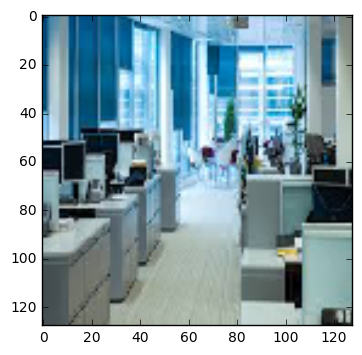

In [530]:
plt.imshow(X_test[10])

In [532]:
print(y_test[10])
print(preds[10])

0
[1]


<span style="color:blue">Parece bastante claro por qué se ha clasificado esta foto de interior como si fuera de exterior. Se debe a que contiene muchos píxeles con color azul (aproximadamente la mitad de la imagen), que puede interpretarse como cielo o mar. También tiene mucha tonalidad blanca, propia de fotos de exteriores con nubes o cielo claro.</span>

## Part 3: method comparison

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Write a small report comparing the results obtained using the two attempted approaches. What are the advantages and disadvantages of each of them?
 </td></tr>
</table>

In [ ]:
####### INSERT YOUR CODE HERE



<span style="color:blue">El mejor modelo SVM, de kernel gaussiano, ha dado una **accuracy** en test de un 70'2%, mientras que la mejor red neuronal ha llegado al 65,4%. El **tiempo de procesamiento** con las redes neuronales es bastante superior y ha habido que reducir el tamaño de las imágenes a 128 x 128 pixeles porque el PC no era capaz de procesar imágenes más grandes. Por otro lado, el **tiempo de preprocesamiento** de las imágenes ha sido superior con SVM que con redes; ha sido necesaria mucha más manipulación hasta llegar al formato de histograma de intensidades. Por otra parte, el modelo SVM lineal es más fácilmente **interpretable** que el de redes.  
Conceptualmente podría esperarse mayor precisión con redes neuronales que con SVM, ya que las capas de convolución tienen en cuenta que la información de las imágenes tienen estructura, es decir, que consideran el entorno de cada píxel; mientras que las SVM no tienen en cuenta los píxeles circundantes a uno dado, sino que descomponen la imagen en píxeles individuales arrancados de su contexto y la convierten en un histograma de intensidades en la que se ha destruido la información de estructura. Sin embargo, no ha sido así. Un modelo de SVM ha logrado mejor rendimiento. En cualquier caso, ambos modelos no son excesivamente fiables. Un 30% de error es elevado. Las imágenes de interior con gran contenido de colores azules y blancos tienden a etiquetarse como imágenes de exterior, y las nocturnas de exteriores se etiquetan como de interior. </span>